A continuación se realizará un experimento para obtener una ecuación que satisfaga un conjunto de datos generados inicialmente, para modificar la ecuación se hará uso del Descenso del gradiente estocástico

In [1]:
import random
import math
import matplotlib.pyplot as plt

Se usará una semilla inicial y unas librerias iniciales

In [2]:
random.seed(42)

Generación de los 100 datos utilizados para el experimento

In [3]:
mainData = []
def setNumberOfData(L):
    for _ in range (L):
        baseN = round(random.uniform(0, 1), 5)
        FactorE = round(random.uniform(-0.3, 0.3), 5)
        finalNum = [baseN, round((math.sin(baseN*math.pi*2)+FactorE), 5)]
        mainData.append(finalNum)

In [4]:
M = 100
setNumberOfData(M)

Se requiere una función que setee los pesos iniciales (Aleatorios) así como la que aplique la ecuación

In [5]:
W_F = []

def setWeights(D_F):
    W_F.clear()
    for i in range(D_F):
        W_F.append(round(random.uniform(-0.5, 0.5), 5))
    print('Initial Weights:', W_F)

def h0(v):
    fV = W_F[0]
    for x in range(1, D_F):
        fV += W_F[x] * (v**x)
    return fV

A continuación se presenta las 3 funciones principales, la primera se encarga de gráficar la raíz del error cuadrático medio (Funcion que utilizaremos para evaluar el desempeño de nuestra función) a traves de las epocas (Ciclos a relizar para actualizar pesos)

La siguiente función se encarga de pintar 3 diferentes datos, primero graficará los 100 datos generados, despues la función seno y por ultimo la función polinomial obtenida

La ultima función se encarga de hacer el descenso del gadiente estocástico; para ello por cada época y punto actulizará los parámetros de la función polinomeal deseada

In [6]:
def graficar_error(errores):
    plt.figure(figsize=(10, 6))
    plt.plot(errores, color='blue', linewidth=2, label='Erms (RMSE)')
    
    plt.title('RMS per Epoch', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('RMS', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.show()

def graficar(mainData, W_F):
    x_puntos = [d[0] for d in mainData]
    y_puntos = [d[1] for d in mainData]
    paso = 1 / 100
    x_curva = [i * paso for i in range(101)]
    y_seno = [math.sin(x * 2 * math.pi) for x in x_curva]
    y_h0 = [h0(x) for x in x_curva]
    plt.figure(figsize=(10, 6))
    plt.scatter(x_puntos, y_puntos, color='gray', alpha=0.4, label='Real data')
    plt.plot(x_curva, y_seno, color='blue', label='Function Sin', linestyle='--')
    plt.plot(x_curva, y_h0, color='red', linewidth=2, label='Model h0')
    plt.title('Comparative plot')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def StochasticGradientDescent(D_F, M, E):
    setWeights(D_F)
    finalError = []
    for e in range(E):
        for i in range(M):
            x = mainData[i][0]
            y_real = mainData[i][1]
            currentError = y_real - h0(x)
            for j in range (D_F):
                W_F[j] = W_F[j] + a*currentError*(x**j)
        globalError = 0
        for m in range(M):
            globalError += (h0(mainData[m][0]) - mainData[m][1])**2
        Erms = math.sqrt(globalError/M)
        finalError.append(Erms)
    print('Final Weights:', W_F)
    print('RMS in First Epoch', ':', finalError[0])
    print('RMS in Last Epoch', ':', finalError[len(finalError)-1])
    graficar_error(finalError)
    graficar(mainData, W_F)

Aqui se definen los parámetros que pueden ser modificados, estos siendo: 
A = Alfa (Tasa de aprendizaje)
D = Número de parámetros
E = Épocas a realizar

In [7]:
a = 0.1
D_F = 5
E = 1000

Al correr el siguiente fragmento de código se realizara el descenso del gradiente estocástico con los parametros definidos, una vez realizada, dibujara las gráficas de la raíz del error cuadrático medio así como las gráficas de interpretación de datos

Initial Weights: [0.469, 0.42637, 0.3487, -0.33369, -0.01436]
Final Weights: [0.0645340584914312, 7.234304756682627, -15.601592823615817, -4.190533583531558, 12.673470772216145]
RMS in First Epoch : 0.63743290283358
RMS in Last Epoch : 0.1978815867365594


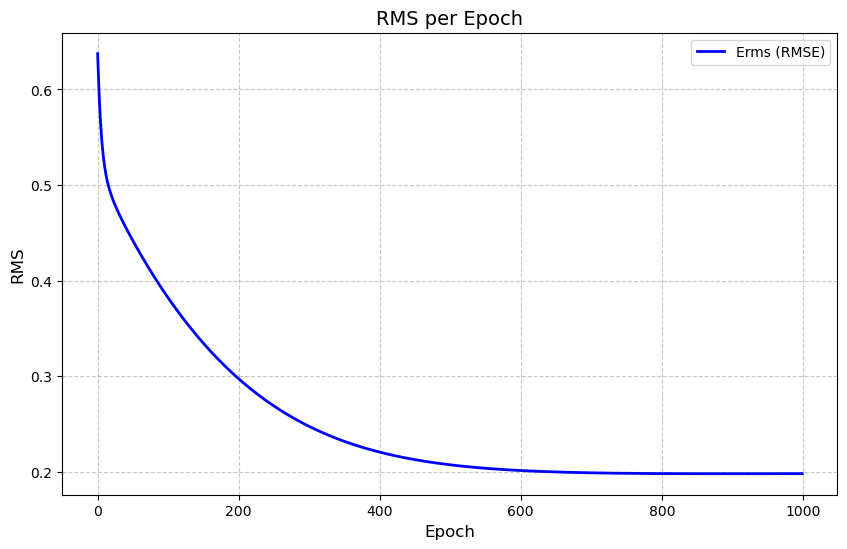

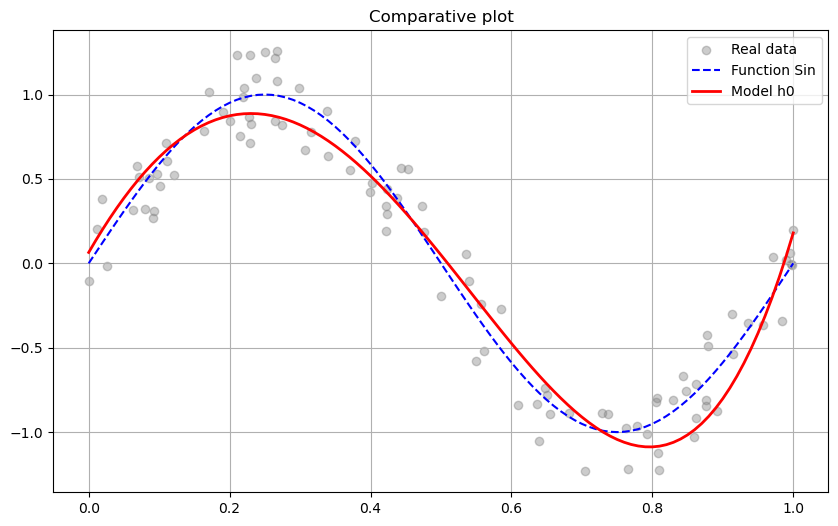

In [8]:
StochasticGradientDescent(D_F, M, E)

Al realizar varias pruebas (Ver el reporte PDF adjunto) se obtuvo que la eucación polinomeal que mejor satisface es aquella que utiliza únicamente 5 parámetros y la cual tenga una tasa de aprendizaje de 0.1

Al realizar más compilaciones, los valores definidos en el repor

Adicionalmente se realizara el gradiante de la función de coste para obtener los finales

Pesos Iniciales [0.21619, -0.26131, -0.10421, 0.17169, -0.2]
Pesos Finales [-0.21474602060471798, 11.776806424074756, -34.184181557604376, 22.97635881412743, -0.19160696892287865]


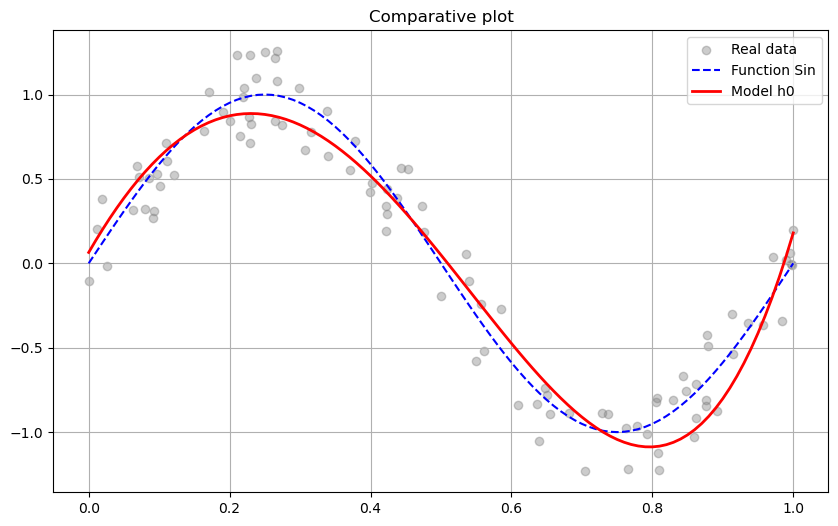

0.33250465814571717


In [17]:
import numpy as np

X_vals = np.array([d[0] for d in mainData])
Y_vals = np.array([d[1] for d in mainData])
X_matriz = np.column_stack([X_vals**j for j in range(D_F)])

W_F_Ex = []

for i in range(D_F):
    W_F_Ex.append(round(random.uniform(-0.5, 0.5), 5))

print('Pesos Iniciales', W_F_Ex)
theta = np.array(W_F_Ex)
theta_final = np.linalg.inv(X_matriz.T @ X_matriz) @ X_matriz.T @ Y_vals

W_F_Ex = theta_final.tolist()
print('Pesos Finales', W_F_Ex)

graficar(mainData, W_F_Ex)

def h0_Ex(v):
    fV = W_F[0]
    for x in range(1, D_F):
        fV += W_F_Ex[x] * (v**x)
    return fV
globalError_Ex = 0
for m in range(M):
    globalError_Ex += (h0_Ex(mainData[m][0]) - mainData[m][1])**2
Erms_Ex = math.sqrt(globalError_Ex/M)
print(Erms_Ex)

Sigue sin ser tan preciso, pero es un muy buen acercamiento